<h2><center>Skin cancer detection by means of AI</center></h2>
<h3><center>Model v0.3</center></h3>

<h4><center>Group 3: Livia Popper, Kyriakos Koukiadakis, Aizhan Shagadatova</center></h4>

This version of the machine learning model made use of data augmentation, with 1000 images for each of the seven skin lesion classes.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing import image

from random import shuffle

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
from tqdm import tqdm
%matplotlib inline

import glob

In [2]:
from PIL import Image
import PIL.ImageOps
import requests
import io

In [3]:
images_url = "https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/images3/"

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/GroundTruth.csv')
df.head(10)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Algorithm implementation

In [5]:
df

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.columns

Index(['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')

In [10]:
list_mel = []

for i in range(len(df)):
    if df.iloc[i]['MEL'] == 1:
        list_mel.append(df.iloc[i]['image'])

list_mel = list_mel[:1000]

In [11]:
list_nv = []

for i in range(len(df)):
    if df.iloc[i]['NV'] == 1:
        list_nv.append(df.iloc[i]['image'])

list_nv = list_nv[:1000]

In [17]:
# png_list_bcc = []

# for filename in glob.glob('./aug_img2/Images_1000/bcc/*.png'):
#     png_list_bcc.append(filename[27:-4])
    
# for k in png_list_bcc:
#     img = Image.open(r'./aug_img2/Images_1000/bcc/' + k + '.png')
#     img.save(r'./aug_img2/Images_1000/bcc_jpg/' + k + '.jpg')

In [28]:
list_bcc = []

for filename in glob.glob('./aug_img2/Images_1000/bcc/*.jpg'):
    list_bcc.append(filename[27:-4])

list_bcc = list_bcc[:1000]

In [36]:
# png_list_akiec = []

# for filename in glob.glob('./aug_img2/Images_1000/akiec/*.png'):
#     png_list_akiec.append(filename[29:-4])
    
# for l in png_list_akiec:
#     img = Image.open(r'./aug_img2/Images_1000/akiec/' + l + '.png')
#     img.save(r'./aug_img2/Images_1000/akiec_jpg/' + l + '.jpg')

In [40]:
list_akiec = []

for filename in glob.glob('./aug_img2/Images_1000/akiec/*.jpg'):
    list_akiec.append(filename[29:-4])

list_akiec = list_akiec[:1000]

1000

In [63]:
list_bkl = []

for i in range(len(df)):
    if df.iloc[i]['BKL'] == 1:
        list_bkl.append(df.iloc[i]['image'])

list_bkl = list_bkl[:1000]

In [46]:
# png_list_df = []

# for filename in glob.glob('./aug_img2/Images_1000/df/*.png'):
#     png_list_df.append(filename[26:-4])
    
# for m in png_list_df:
#     img = Image.open(r'./aug_img2/Images_1000/df/' + m + '.png')
#     img.save(r'./aug_img2/Images_1000/df_jpg/' + m + '.jpg')

In [50]:
list_df = []

for filename in glob.glob('./aug_img2/Images_1000/df/*.jpg'):
    list_df.append(filename[26:-4])

list_df = list_df[:1000]

In [57]:
# png_list_vasc = []

# for filename in glob.glob('./aug_img2/Images_1000/vasc/*.png'):
#     png_list_vasc.append(filename[28:-4])

# for n in png_list_vasc:
#     img = Image.open(r'./aug_img2/Images_1000/vasc/' + n + '.png')
#     img.save(r'./aug_img2/Images_1000/vasc_jpg/' + n + '.jpg')

In [61]:
list_vasc = []

for filename in glob.glob('./aug_img2/Images_1000/vasc/*.jpg'):
    list_vasc.append(filename[28:-4])

list_vasc = list_vasc[:1000]

In [64]:
list_all_chosen_images = list_mel[:]
list_all_chosen_images.extend(list_nv)
list_all_chosen_images.extend(list_bcc)
list_all_chosen_images.extend(list_akiec)
list_all_chosen_images.extend(list_bkl)
list_all_chosen_images.extend(list_df)
list_all_chosen_images.extend(list_vasc)

In [65]:
len(list_all_chosen_images)

7000

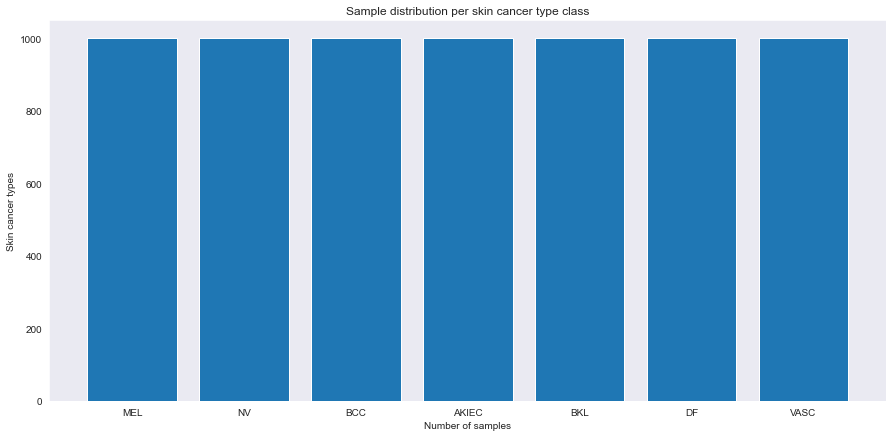

In [66]:
fig = plt.figure(figsize = (15,7))
# ax = fig.add_axes([0,0,1,1])
samples_cols = [len(list_mel), len(list_nv), len(list_bcc), len(list_akiec), len(list_bkl), len(list_df), len(list_vasc)]
plt.bar(cols,samples_cols)
plt.xlabel("Number of samples")
plt.ylabel("Skin cancer types")
plt.title("Sample distribution per skin cancer type class")
plt.grid(False)
plt.show()
# plt.savefig('sample_distribution_per_class_v0.2.png', transparent=True)

In [67]:
balanced_df_3_0 = pd.DataFrame(list_all_chosen_images, columns = ['image'])
balanced_df_3_0

,image
0,ISIC_0024310
1,ISIC_0024313
2,ISIC_0024315
3,ISIC_0024323
4,ISIC_0024333
...,...
6995,_20_5149016
6996,_61_2260984
6997,_7_3858018
6998,_100_2207520


In [68]:
# balanced_df_3_0.to_csv('balanced_df_3_0.csv', index=False)

In [6]:
imported_csv = pd.read_csv('https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/balanced_df_3_1.csv')

In [7]:
imported_csv

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024310,1,0,0,0,0,0,0
1,ISIC_0024313,1,0,0,0,0,0,0
2,ISIC_0024315,1,0,0,0,0,0,0
3,ISIC_0024323,1,0,0,0,0,0,0
4,ISIC_0024333,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6995,_20_5149016,0,0,0,0,0,0,1
6996,_61_2260984,0,0,0,0,0,0,1
6997,_7_3858018,0,0,0,0,0,0,1
6998,_100_2207520,0,0,0,0,0,0,1


In [12]:
train_image = []

for i in tqdm(range(imported_csv.shape[0])):
    img = Image.open(io.BytesIO((requests.get(images_url+imported_csv['image'][i]+'.jpg', stream=True)).content))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████| 7000/7000 [00:53<00:00, 130.39it/s]


In [78]:
X.shape

(7000, 450, 600, 3)

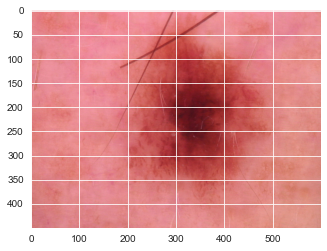

In [79]:
plt.imshow(X[1000])

In [13]:
y = np.array(imported_csv.drop(['image'],axis=1))
y.shape

(7000, 7)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [82]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(450,600,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(7, activation='softmax'))

2022-04-24 17:27:29.111870: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 448, 598, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 299, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 297, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 148, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 111, 148, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 146, 64)      1

In [84]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
callback = EarlyStopping(monitor='val_loss', patience = 5)

In [86]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=90, callbacks = [callback])

Epoch 1/50
70/70 [==============================] - 472s 6s/step - loss: 1.9016 - accuracy: 0.1995 - val_loss: 1.8076 - val_accuracy: 0.2400
Epoch 2/50
70/70 [==============================] - 454s 6s/step - loss: 1.7360 - accuracy: 0.2790 - val_loss: 1.6658 - val_accuracy: 0.3486
Epoch 3/50
70/70 [==============================] - 429s 6s/step - loss: 1.5691 - accuracy: 0.3784 - val_loss: 1.5476 - val_accuracy: 0.4229
Epoch 4/50
70/70 [==============================] - 428s 6s/step - loss: 1.3947 - accuracy: 0.4681 - val_loss: 1.4954 - val_accuracy: 0.4114
Epoch 5/50
70/70 [==============================] - 436s 6s/step - loss: 1.2337 - accuracy: 0.5343 - val_loss: 1.3145 - val_accuracy: 0.4643
Epoch 6/50
70/70 [==============================] - 435s 6s/step - loss: 1.1056 - accuracy: 0.5830 - val_loss: 1.3109 - val_accuracy: 0.4729
Epoch 7/50
70/70 [==============================] - 443s 6s/step - loss: 0.9874 - accuracy: 0.6257 - val_loss: 1.1966 - val_accuracy: 0.5043
Epoch 8/50
70

In [87]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


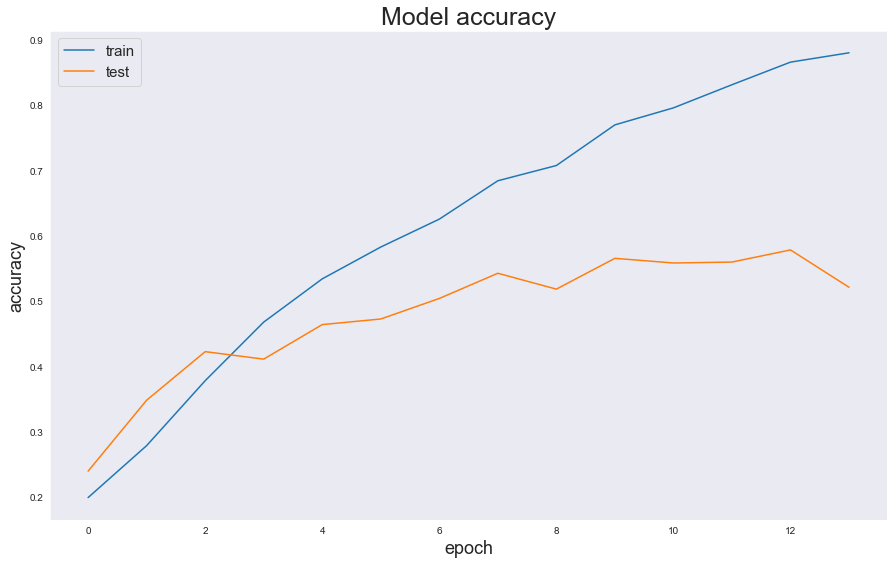

In [89]:
# summarize history for accuracy
fig = plt.figure(figsize = (15,9))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=25)
plt.ylabel('accuracy', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left', fontsize=15)
plt.grid(False)
plt.show()
# plt.savefig('model_acc_1000.png', transparent=True)

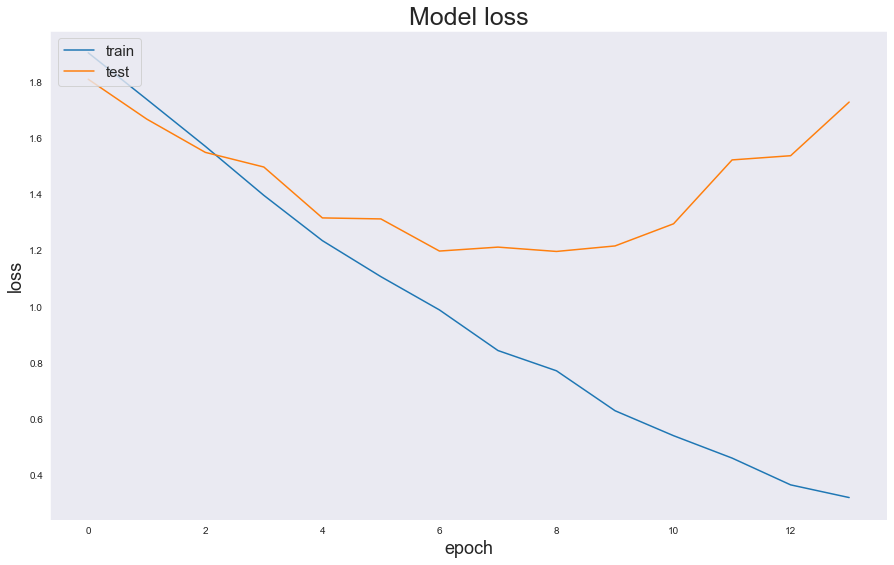

In [91]:
# summarize history for loss
fig = plt.figure(figsize = (15,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=25)
plt.ylabel('loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left', fontsize=15)
plt.grid(False)
plt.show()
# plt.savefig('model_loss_1000.png', transparent=True)

In [15]:
y_pred = model.predict(X_test)
y_pred

array([[8.1686726e-17, 4.5063306e-12, 6.0143152e-10, ..., 7.1956169e-16,
        5.2070480e-11, 1.0000000e+00],
       [1.6372868e-01, 2.9702213e-01, 6.5699026e-02, ..., 1.5633219e-01,
        2.2635981e-01, 3.7165493e-05],
       [8.2977965e-07, 3.4782509e-04, 9.9733716e-01, ..., 1.3904289e-05,
        2.8853511e-04, 8.3716400e-04],
       ...,
       [1.1057818e-02, 6.5965891e-02, 4.5968342e-01, ..., 1.6460845e-01,
        3.9575249e-02, 5.4544988e-03],
       [1.9288385e-02, 4.7885753e-02, 1.6745703e-01, ..., 5.0172114e-01,
        7.2864696e-02, 1.8593111e-03],
       [2.4571235e-03, 9.7147667e-01, 2.6308645e-03, ..., 2.1043520e-02,
        6.1955588e-04, 2.0084017e-06]], dtype=float32)

In [16]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [18]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

In [19]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[29 13  5  6 34  6  2]
 [ 8 78  5  4 17  4  4]
 [ 2  2 46 10 10  4  5]
 [ 2  8 45 26 18 22  0]
 [10 10  5  5 57  2  0]
 [ 1  7 22 14  7 42  4]
 [ 1  1  5  0  1  4 87]]


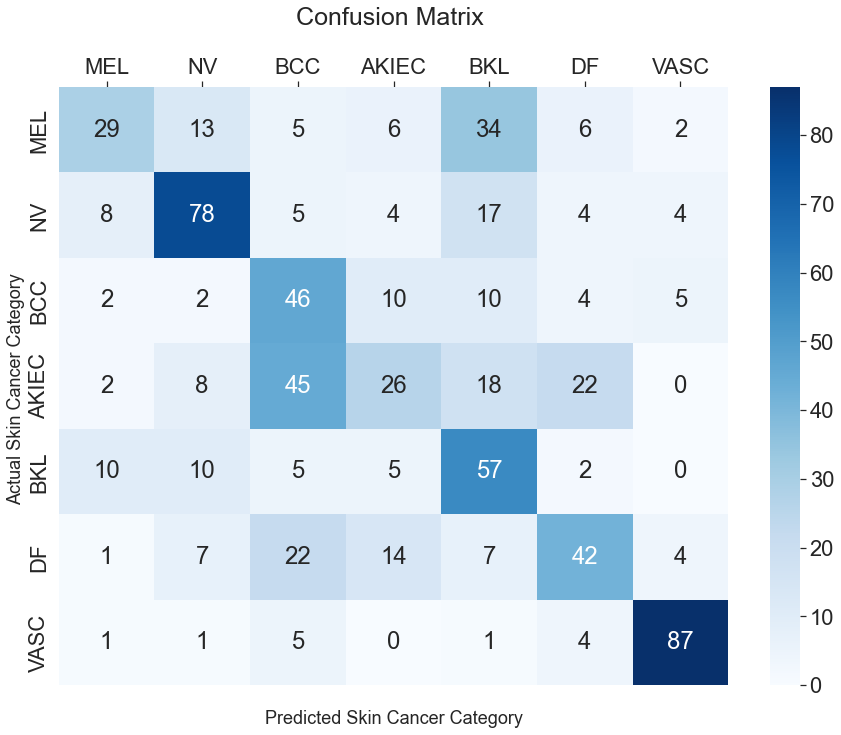

In [21]:
import seaborn as sns

fig = plt.figure(figsize = (15,11))
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
sns.set(font_scale=2.0)
ax.set_title('Confusion Matrix \n', fontsize=25)
ax.set_xlabel('\nPredicted Skin Cancer Category', fontsize=18)
ax.set_ylabel('Actual Skin Cancer Category ', fontsize=18)
ax.xaxis.tick_top()

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['MEL','NV', 'BCC', 'AKIEC','BKL', 'DF', 'VASC'])
ax.yaxis.set_ticklabels(['MEL','NV', 'BCC', 'AKIEC','BKL', 'DF', 'VASC'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [23]:
target_names = ['MEL','NV', 'BCC', 'AKIEC','BKL', 'DF', 'VASC']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         MEL       0.55      0.31      0.39        95
          NV       0.66      0.65      0.65       120
         BCC       0.35      0.58      0.43        79
       AKIEC       0.40      0.21      0.28       121
         BKL       0.40      0.64      0.49        89
          DF       0.50      0.43      0.46        97
        VASC       0.85      0.88      0.87        99

    accuracy                           0.52       700
   macro avg       0.53      0.53      0.51       700
weighted avg       0.54      0.52      0.51       700



In [105]:
# Save the entire model to a HDF5 file
# model.save('cnn_v0_3_1000.h5')

#### How to save and reload a model? More info here:
https://www.tensorflow.org/tutorials/keras/save_and_load

https://machinelearningmastery.com/save-load-keras-deep-learning-models/